In [1]:
from plotnine import *
import pandas as pd
import numpy as np

In [9]:
# time = "2024-03-29_04:53"
time = "2024-03-29_07:23"
time = "2024-03-31_15:54"
time = "2024-03-31_16:37"
time = "2024-03-31_17:12"
time = "2024-04-01_15:42"
time = "2024-04-01_17:06"
time = "2024-04-01_18:11"
time = "2024-04-16_16:47"
time = "2024-04-18_19:23"
time = "2024-04-18_20:30"
time = "2024-04-19_01:29"
time = "2024-04-19_09:39"
time = "2024-05-19_16:34"
time = "2024-05-19_16:58"
time = "2024-05-19_17:38"
time = "2024-05-19_18:55"
time = "2024-05-20_04:15"



df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/unsupervised/kmeans/results/{time}_results.csv")

# df['test_cumsum_annualized_return'] = df['test_cumsum_annualized_return'] * -1
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["window"] < 5]
# df = df[df["random_state"] == 42]
# df = df[df["test_size"] == 2880]
# df = df[df["algorithm"] == "kmeans"]
# df = df[(df["test_negative_sharpe_ratio"] >= 1) | (df["test_sharpe_ratio"] >= 1)]
df = df[(df["test_negative_sharpe_ratio"] >= 0.15) | (df["test_sharpe_ratio"] >= 0.15)]

df

,window,train_sum_annualized_return,train_sum_actual_return,train_n_trades,test_sum_annualized_return,test_sum_actual_return,test_n_trades,train_cumsum_annualized_return,train_cumsum_actual_return,train_sharpe_ratio,test_cumsum_annualized_return,test_cumsum_actual_return,test_sharpe_ratio,test_negative_sharpe_ratio,max_k_labels,n_clusters,algorithm,train_size,test_size,random_state
35560,0,1.58,158,461,-0.43,-43,57,1.58,158,3.047932,-0.43,-43,-0.210522,0.153188,5,70,gaussian_mixture,4800,960,90
35561,1,0.91,91,469,-0.07,-7,99,2.49,249,3.047932,-0.50,-50,-0.210522,0.153188,5,70,gaussian_mixture,4800,960,90
35562,2,0.90,90,513,0.17,17,99,3.39,339,3.047932,-0.33,-33,-0.210522,0.153188,5,70,gaussian_mixture,4800,960,90
35563,3,1.93,193,510,-0.30,-30,66,5.32,532,3.047932,-0.63,-63,-0.210522,0.153188,5,70,gaussian_mixture,4800,960,90
35564,4,1.79,179,493,-0.73,-73,107,7.11,711,3.047932,-1.36,-136,-0.210522,0.153188,5,70,gaussian_mixture,4800,960,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758344,124,0.97,97,175,-0.13,-13,32,95.36,9536,3.925106,-4.32,-432,-0.266648,0.155509,2,90,gaussian_mixture,3840,960,20
758345,125,0.69,69,178,-0.23,-23,67,96.05,9605,3.925106,-4.55,-455,-0.266648,0.155509,2,90,gaussian_mixture,3840,960,20
758346,126,0.67,67,133,-0.19,-19,35,96.72,9672,3.925106,-4.74,-474,-0.266648,0.155509,2,90,gaussian_mixture,3840,960,20
758347,127,0.60,60,124,-0.06,-6,23,97.32,9732,3.925106,-4.80,-480,-0.266648,0.155509,2,90,gaussian_mixture,3840,960,20


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


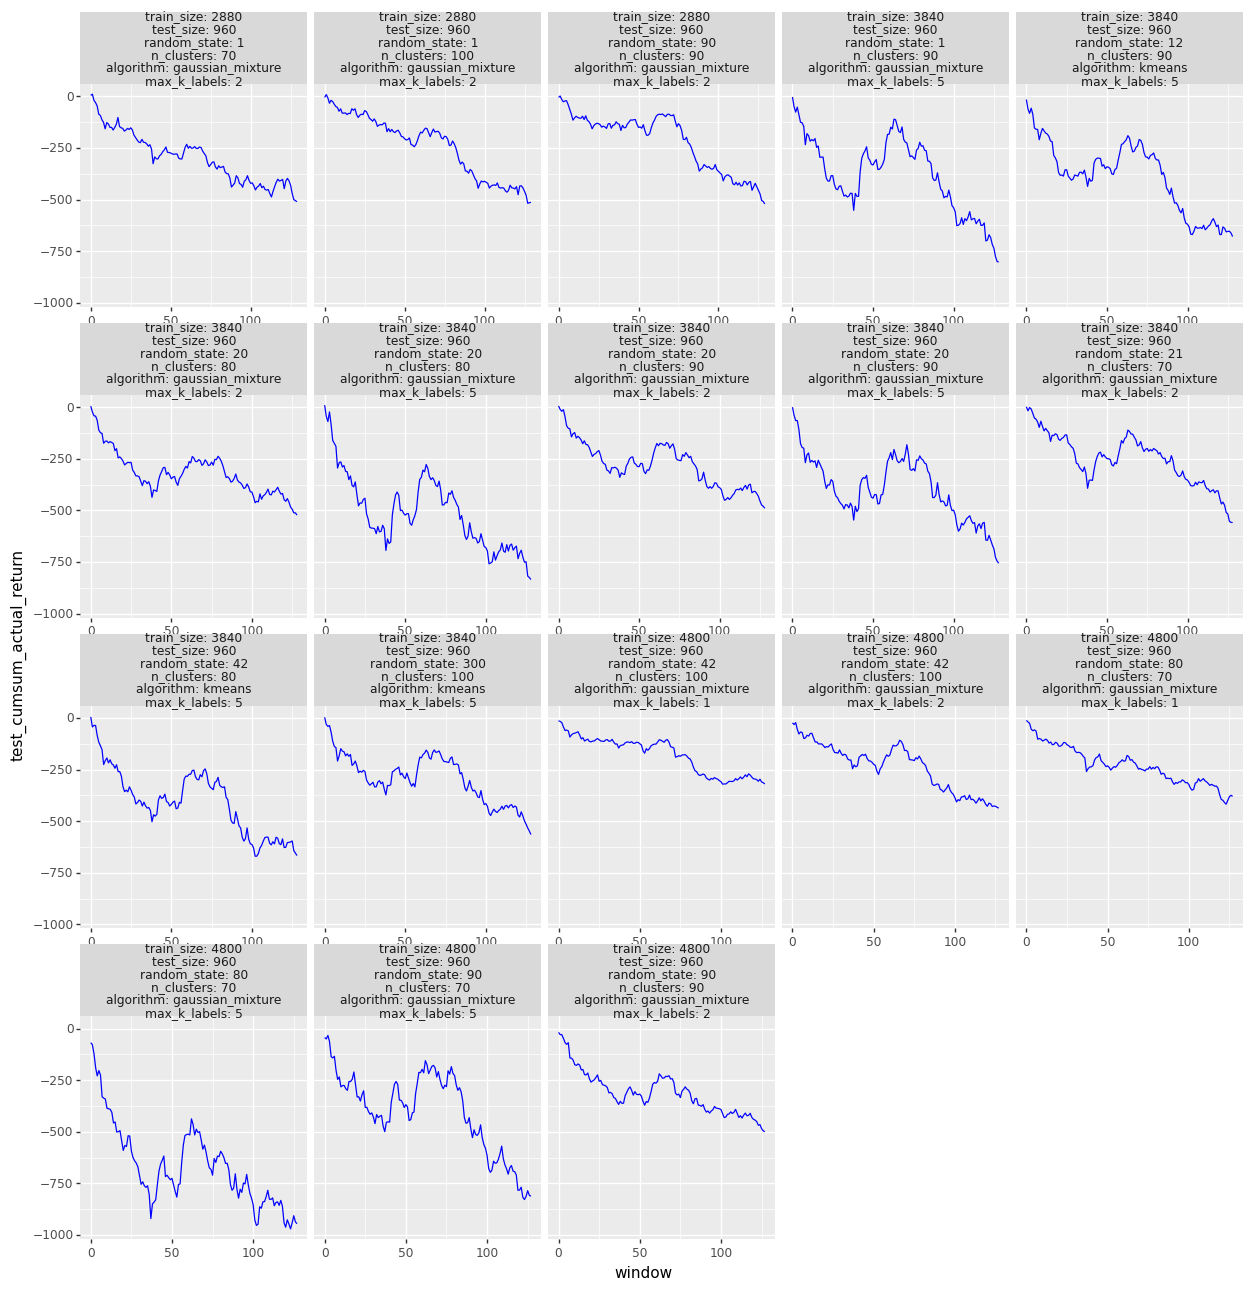

In [10]:
p = ggplot(df)
# p = p + geom_line(aes(x="window", y="train_cumsum_annualized_return"), color="red")
p = p + geom_line(aes(x="window", y="test_cumsum_actual_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_avg_calmar_ratio"), color="red")
# p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
p = p + facet_wrap("~train_size + test_size + random_state + n_clusters + algorithm + max_k_labels", scales="free_x", labeller="label_both")
p = p + theme(figure_size=(15, 15))
# p = p + theme(figure_size=(10, 10))
print(p)

In [ ]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)